In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier #Import scikit-Tree For Decision Tree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix #import Confusion Matrix
from sklearn.model_selection import train_test_split # Splitting the data
from sklearn import preprocessing # Normalizing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import time


In [2]:
df_o = pd.read_csv("../data/processed/data_undersampled.csv",index_col=0)

In [3]:
# Normalizing the data
x = df_o.values #returns a numpy array
col = df_o.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_n = pd.DataFrame(x_scaled, columns = col)

# df_n

In [4]:
X = df_o.drop("isFirstDown",1)   #Feature Matrix
y = df_o["isFirstDown"]          #Target Variable

In [5]:
# from sklearn.model_selection import train_test_split # Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=72)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8370, 19)
(3588, 19)
(8370,)
(3588,)


In [6]:
# Fitting Logistic Regression to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [8]:
# Model Accuracy, how often is the classifier correct?

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

acc = pd.read_csv("../data/external/accuracies.csv", index_col=0)
acc.at['K-Nearest, Undersampled', 'Accuracy'] = accuracy
acc.at['K-Nearest, Undersampled', 'Precision'] = precision
acc.at['K-Nearest, Undersampled', 'Recall'] = recall
acc.at['K-Nearest, Undersampled', 'F1'] = f1
acc.to_csv("../data/external/accuracies.csv")

Accuracy: 0.563824
Precision: 0.592322
Recall: 0.366723
F1 score: 0.452988


In [9]:
# Making the confusion matrix
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:

[[1375  446]
 [1119  648]]

Classification Report:

              precision    recall  f1-score   support

           0       0.55      0.76      0.64      1821
           1       0.59      0.37      0.45      1767

   micro avg       0.56      0.56      0.56      3588
   macro avg       0.57      0.56      0.55      3588
weighted avg       0.57      0.56      0.55      3588



In [10]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap


In [11]:
knnvals={}
for i in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knnvals[i]=accuracy
    
dfknn = pd.DataFrame.from_dict(knnvals, orient="index", columns=['acc'])
dfknn

,acc
1,0.547101
2,0.548774
3,0.559086
4,0.563824
5,0.567726
6,0.570234
7,0.561873
8,0.570792
9,0.563545
10,0.568283


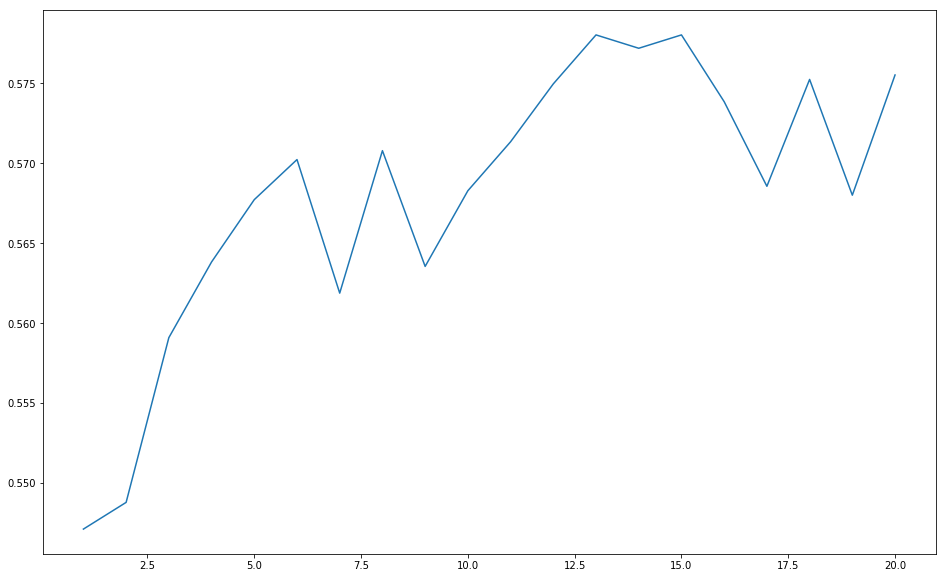

In [12]:
plt.figure(figsize=(16, 10))
plt.plot(dfknn, scalex=range(1,21))
